## TASK-5 Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Checking number of rows and columns of the dataset.
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  200
Number of columns are:  5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Checking duplicates
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [7]:
# Checking null values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Some basic characterstics of dataset

* The advertising dataset consists of sales from TV,Radio and Newspaper.
* There are 200 rows and57 columns provided in the data.
* No duplicate values present in the dataset.
* No null values in the dataset.

In [8]:
# Removing the 'Unnamed: 0' column as it's no longer needed
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# Checking unique values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


In [11]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


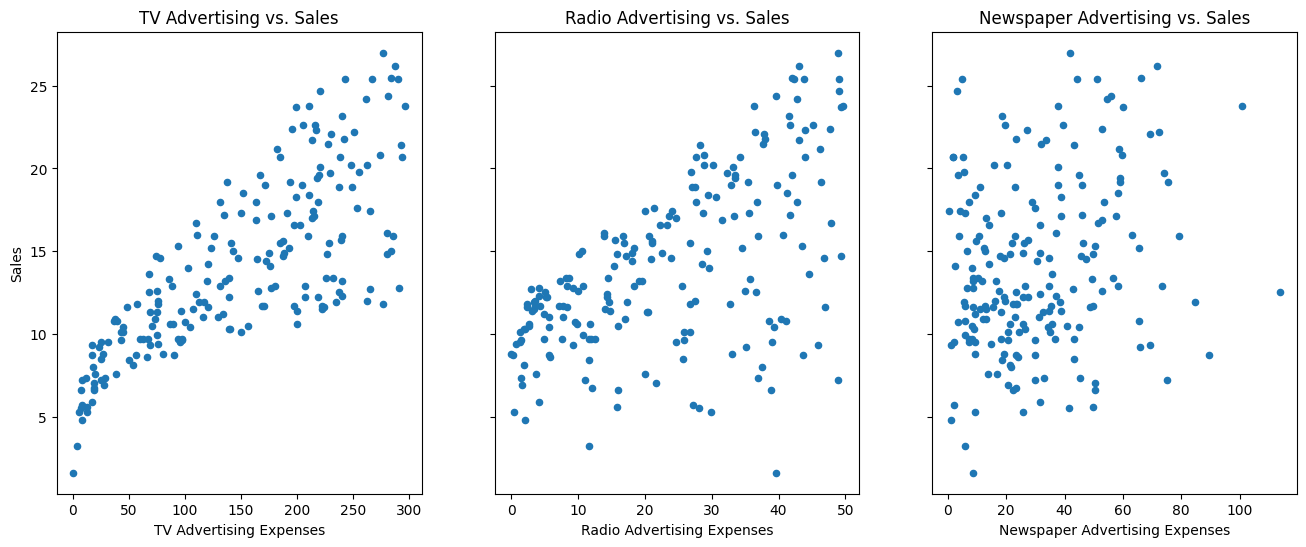

In [12]:
# Scatter plot for comparing effect of advertisment from different sources on sales

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# For TV advertising expenses vs. Sales
data.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# For Radio advertising expenses vs. Sales
data.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# For Newspaper advertising expenses vs. Sales
data.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

plt.show()

## Interpretation
* Sales are increasing with increases in both TV and Radio advertising expenses.
* Outliers are present in the graph of Newspaper advertising versus Sales.

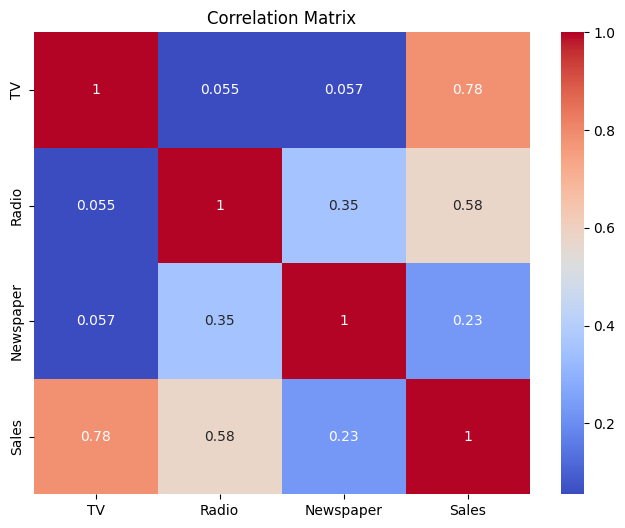

In [13]:
# Compute correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Correlation Analysis Interpretation

### 1. **TV and Sales**
- **Correlation coefficient: 0.78**
- This indicates a **strong positive correlation** between TV advertising and sales which means increasing TV advertising expenses tends to increase sales significantly.
---
### 2. **Radio and Sales**
- **Correlation coefficient: 0.58**
- This is a **moderate positive correlation**.
- Increased spending on radio advertising is also associated with increased sales, but the effect is **less pronounced than TV**.
- Radio still plays a meaningful role in driving sales.
---
### 3. **Newspaper and Sales**
- **Correlation coefficient: 0.23**
- This is a **weak positive correlation**.
- There is only a slight increase in sales with increased newspaper advertising.
- This suggests that newspaper ads may not be as effective in boosting sales compared to TV or radio.
---
### Summary
> **TV advertising** has the strongest impact on sales, followed by **radio**, while **newspaper** advertising shows only a minor influence.


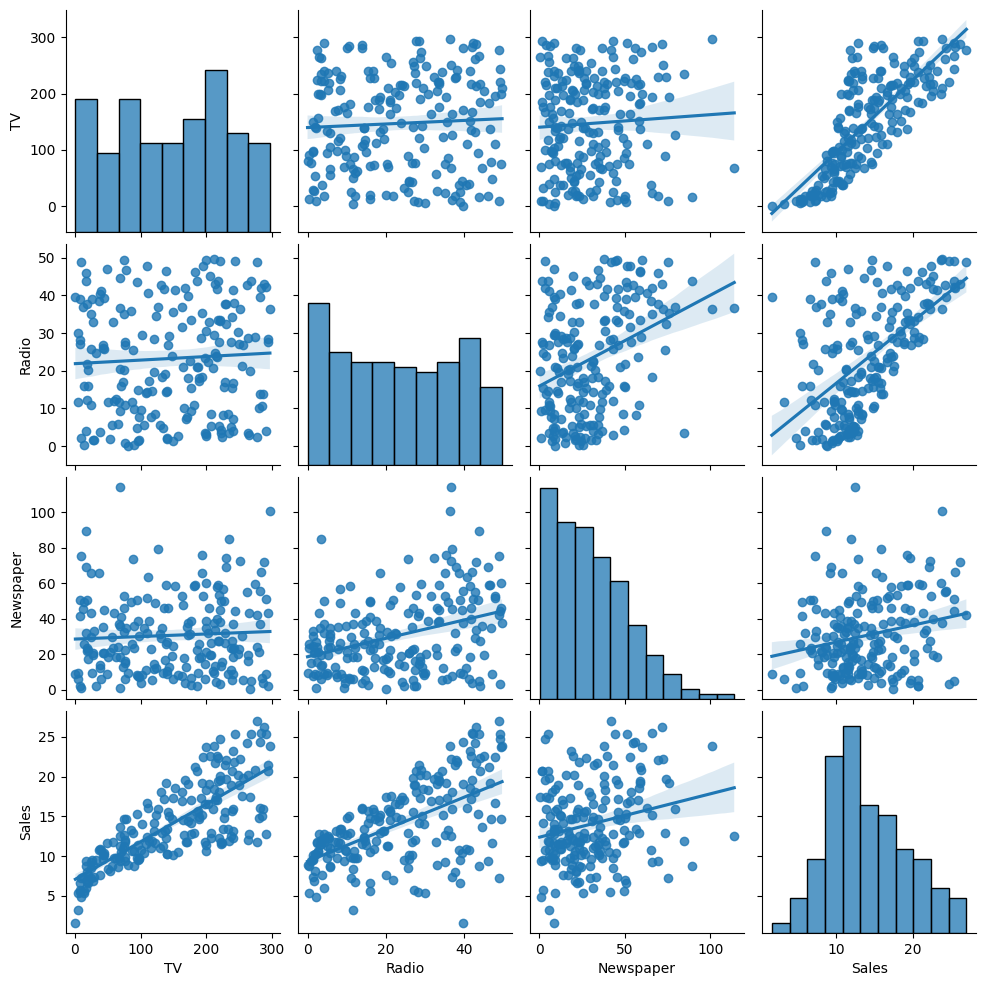

In [14]:
# Pair plot 
sns.pairplot(data,kind="reg");
plt.show()

## Pairplot Interpretation

This pairplot visualizes the pairwise relationships between **TV**, **Radio**, **Newspaper**, and **Sales** using scatter plots and histograms.

---

### 1. **TV vs Sales**
- **Strong positive linear relationship**.
- The points are tightly clustered around a positively sloped line, indicating that as **TV advertising** increases, **Sales** increase significantly.
- This supports the high correlation observed in the heatmap (`r = 0.78`).

---

### 2. **Radio vs Sales**
- **Moderate positive relationship**.
- There is a noticeable upward trend, but the spread of points is wider compared to TV vs Sales.
- Indicates that **Radio ads** do influence sales, but less consistently than TV.

---

### 3. **Newspaper vs Sales**
- **Weak relationship** with a wide scatter of points and no strong visible trend.
- Suggests that **Newspaper advertising has minimal or inconsistent effect** on Sales.
- Some outliers may be present, especially at higher newspaper ad spends with relatively lower sales.

---

### Distribution Insights
- **TV** and **Radio** ad spends are fairly uniformly distributed.
- **Newspaper** shows a right-skewed distribution (many low values).
- **Sales** is roughly **normally distributed**, peaking around 15.

---

### Other Pairwise Relationships
- **TV and Radio** have little correlation, suggesting they are used independently.
- **Radio and Newspaper** have a mild positive relationship.
- **TV and Newspaper** show almost no correlation.

---

### Conclusion
> - **TV advertising** is the most effective channel for increasing sales.  
> - **Radio** also contributes positively, though to a lesser extent.  
> - **Newspaper advertising** has the weakest relationship with sales and may need to be reconsidered or optimized.


### Identifying outliers for newspaper

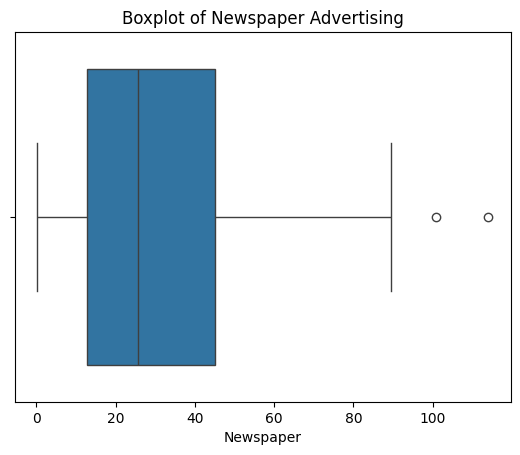

In [15]:
# Using boxplot
sns.boxplot(x=data['Newspaper'])
plt.title("Boxplot of Newspaper Advertising")
plt.show()

## Boxplot Interpretation

This boxplot visualizes the distribution of **Newspaper advertising expenses** and identifies any potential outliers.

---

### Key Observations:

- **Median (Q2)**:  
  The bold vertical line within the box is around **30–35**, representing the median newspaper ad spend.

- **Interquartile Range (IQR)**:
  - **Q1 (25th percentile)** ≈ 15  
  - **Q3 (75th percentile)** ≈ 55  
  - Thus, 50% of the data lies between **15 and 55 units** of ad spend.

- **Whiskers**:
  - The lower whisker starts near **0–5**, indicating the minimum value without being considered an outlier.
  - The upper whisker extends up to approximately **85**.

- **Outliers**:
  - There are **two outlier points** beyond the upper whisker (above 100), indicated as hollow circles.
  
---

### Interpretation Summary:

- The bulk of newspaper advertising spending is **concentrated between 15 and 55 units**.
- A few instances show **unusually high spending (>100)** — these are potential **outliers**.
- These outliers may **skew the analysis** and should be further analyzed or removed depending on the context.

In [16]:
# Using IQR(Interquartile Range) Method
# The IQR method is widely used to detect outliers. It defines outliers as data points lying below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.

# Calculate Q1 and Q3 for Newspaper
Q1 = data['Newspaper'].quantile(0.25)
Q3 = data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data[(data['Newspaper'] < lower_bound) | (data['Newspaper'] > upper_bound)]
print("Number of outliers in 'Newspaper':", len(outliers))

Number of outliers in 'Newspaper': 2


In [17]:
# Removing outliers
data.drop(data[(data['Newspaper'] < lower_bound) | (data['Newspaper'] > upper_bound)].index, inplace=True)

In [18]:
# Defining features and target variable
X = data[['TV', 'Radio', 'Newspaper']]  # Adjust columns based on your dataset
y = data['Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [20]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 2.7409119066899947
Root Mean Squared Error: 1.6555699642993027
R-squared: 0.8989454779619588


## Model Performance Interpretation

The following metrics summarize the performance of the regression model:

#### Mean Squared Error (MSE): 2.74 
  - On average, the squared difference between the actual and predicted sales is 2.74 units².
  - Lower values indicate better model performance.

#### Root Mean Squared Error (RMSE): 1.66  
  - The square root of MSE, providing an error metric in the same units as the target variable.
  - On average, predictions deviate from actual values by approximately 1.66 units.

#### R-squared (R²): 0.899  
  - This means 89.9% of the variance in Sales is explained by the model.
  - This suggests a strong fit and good predictive capability — the closer R² is to 1, the better the model explains the variability in the data.

### Conclusion:  
The model shows strong performance with high explanatory power and relatively low prediction error. The high R² value suggests that the model is effectively capturing the underlying pattern in the data.

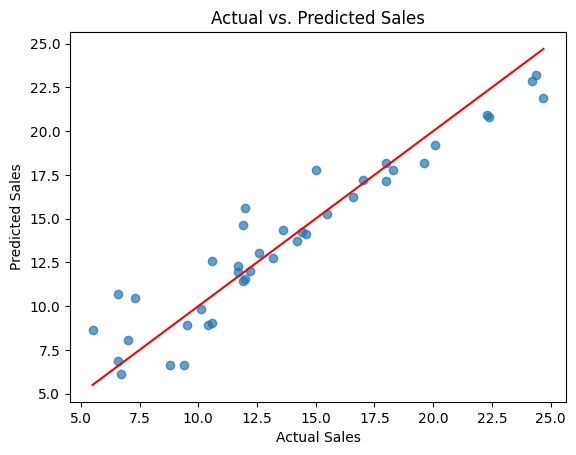

In [21]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for reference
plt.show()


## Actual vs. Predicted Sales Plot 

This plot illustrates the relationship between the Actual Sales and the Predicted Sales generated by regression model.

#### Plot Details:

- X-axis: Actual Sales 
- Y-axis: Predicted Sales 
- Blue dots: Individual observations (data points)
- Red line:  Ideal line where predicted = actual (i.e., perfect prediction)

#### Interpretation:

#####  Good Alignment with the Red Line:

Most of the blue dots are closely clustered around the red line, which means our model’s predictions are fairly accurate for the majority of observations.

##### Minor Deviations:

There are a few points scattered above or below the red line — this shows minor prediction errors, which are normal. These deviations appear random and not systematic which is a good indicator that the model is not biased.

##### Overall Fit:

The scatter around the line is relatively tight, confirming what the R² value (~0.899) showed that is our model explains nearly 90% of the variation in sales.

#### Conclusion:

- The model is performing very well.
- Predictions are quite accurate and consistent with actual values.
- The visual confirms that the model generalizes well with no major outliers or bias.
